# Расчет кривой до 1 года

#### Данные рынка

In [1]:
swap_1 = -0.0011
base_rate = 0.0
DAYCOUNT, HALF_YEAR, YEAR_COUNT = 30, 180, 360 # соглашение о количестве дней

#### Предплоложение

Процентные ставки линейно изменяются от $base\ rate$ (известен с рынка) до $rate_{1Y}$ (надо найти)

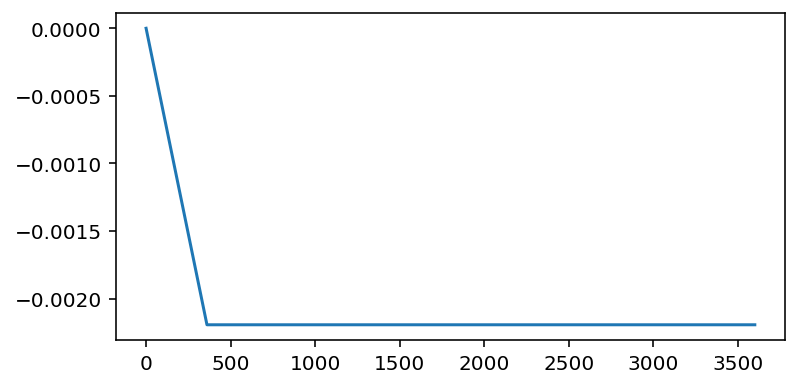

In [16]:
import numpy as np
import pandas as pd
import scipy.optimize as opt


def swap1(curve, end_rate, swap_rate):
    start_rate = curve[0]
    curve[:] = np.nan
    curve[0] = start_rate
    curve[YEAR_COUNT] = end_rate
    curve.interpolate(inplace=True)
    discount_factors = np.cumprod(1.0/(1 + curve/YEAR_COUNT))
    floating = curve.rolling(window = HALF_YEAR).mean()
    pv_floating = 0.5*discount_factors[HALF_YEAR]*floating[HALF_YEAR] + 0.5*discount_factors[YEAR_COUNT]*floating[YEAR_COUNT]
    calculated_price = pv_floating / discount_factors[YEAR_COUNT]
    return calculated_price - swap_rate

curve = pd.Series(np.empty(10*YEAR_COUNT+1))
curve[0] = base_rate

opt.newton(lambda x: swap1(curve, x, swap_1), base_rate)
curve.plot(figsize=(6,3))



# Расчет кривой до 2 лет

#### Данные рынка

In [3]:
swap_2 = -0.0015

#### Предплоложение

Процентные ставки линейно изменяются от $rate_{1Y}$ (известна с предыдущего шага) до $rate_{2Y}$ (надо найти)

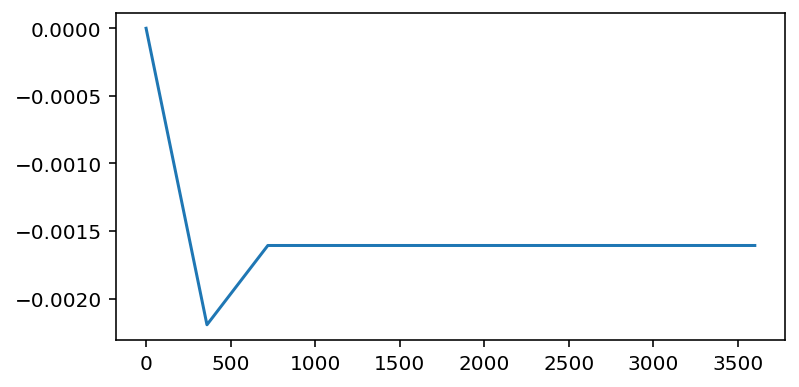

In [4]:
def swap2(curve, end_rate, swap_rate):
    start_rate = curve[YEAR_COUNT]
    curve[YEAR_COUNT:] = np.nan
    curve[YEAR_COUNT] = start_rate
    curve[2*YEAR_COUNT] = end_rate
    curve.interpolate(inplace=True)
    discount_factors = np.cumprod(1.0/(1 + curve/YEAR_COUNT))
    floating_rate = curve.rolling(window = HALF_YEAR).mean()
    payment_schedule_floating = range(HALF_YEAR, 2*YEAR_COUNT+1, HALF_YEAR)
    pv_floating = 0.5*sum([discount_factors[p]*floating_rate[p] for  p in payment_schedule_floating])
    payment_schedule_fixed = range(YEAR_COUNT, 2*YEAR_COUNT+1, YEAR_COUNT)
    calculated_price = pv_floating / sum(discount_factors[p] for p in payment_schedule_fixed)
    return calculated_price - swap_rate

opt.newton(lambda x: swap2(curve, x, swap_2), x0=curve[YEAR_COUNT], rtol=1e-15)
curve.plot(figsize=(6,3))

# Расчет кривой до 3 до 10 лет

#### Данные рынка

In [5]:
swap_3 = -0.0015

#### Расчет кривой

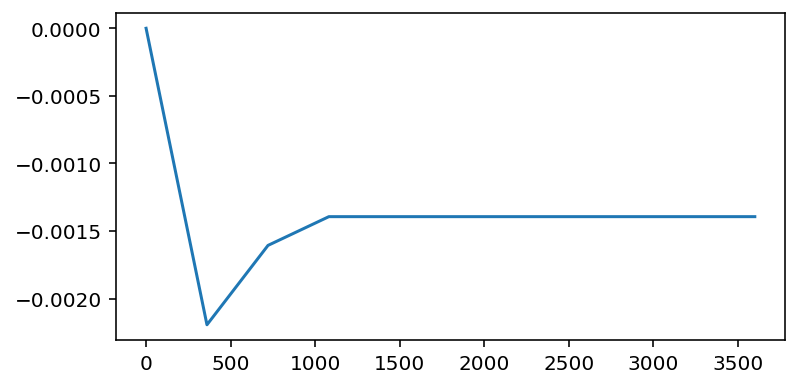

In [6]:
def swap3(curve, end_rate, swap_rate):
    start_rate = curve[2*YEAR_COUNT]
    curve[2*YEAR_COUNT:] = np.nan
    curve[2*YEAR_COUNT] = start_rate
    curve[3*YEAR_COUNT] = end_rate
    curve.interpolate(inplace=True)
    discount_factors = np.cumprod(1.0/(1 + curve/YEAR_COUNT))
    floating_rate = curve.rolling(window = HALF_YEAR).mean()
    payment_schedule_floating = range(HALF_YEAR, 3*YEAR_COUNT+1, HALF_YEAR)
    pv_floating = 0.5*sum([discount_factors[p]*floating_rate[p] for  p in payment_schedule_floating])
    payment_schedule_fixed = range(YEAR_COUNT, 3*YEAR_COUNT+1, YEAR_COUNT)
    calculated_price = pv_floating / sum(discount_factors[p] for p in payment_schedule_fixed)
    return calculated_price - swap_rate

opt.newton(lambda x: swap3(curve, x, swap_3), x0=curve[2*YEAR_COUNT], rtol=1e-15)
curve.plot(figsize=(6,3))

#### Данные рынка

In [7]:
swap_4 = -0.0014
swap_5 = -0.0011
swap_6 = -0.0005
swap_7 = 0.0001
swap_8 = 0.0007
swap_9 = 0.0014
swap_10= 0.0020

#### Расчет кривой

In [8]:
def swapN(curve, N, end_rate, swap_rate):
    start_rate = curve[(N-1)*YEAR_COUNT]
    curve[(N-1)*YEAR_COUNT:] = np.nan
    curve[(N-1)*YEAR_COUNT] = start_rate
    curve[N*YEAR_COUNT] = end_rate
    curve.interpolate(inplace=True)
    discount_factors = np.cumprod(1.0/(1 + curve/YEAR_COUNT))
    floating_rate = curve.rolling(window = HALF_YEAR).mean()
    payment_schedule_floating = range(HALF_YEAR, N*YEAR_COUNT+1, HALF_YEAR)
    pv_floating = 0.5*sum([discount_factors[p]*floating_rate[p] for  p in payment_schedule_floating])
    payment_schedule_fixed = range(YEAR_COUNT, N*YEAR_COUNT+1, YEAR_COUNT)
    calculated_price = pv_floating / sum(discount_factors[p] for p in payment_schedule_fixed)
    return calculated_price - swap_rate

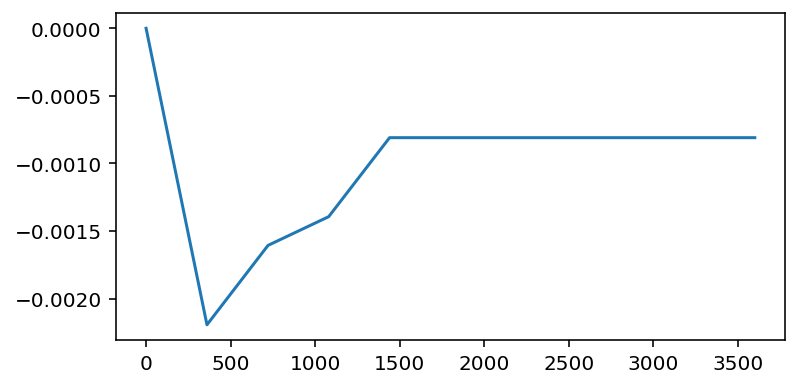

In [9]:
opt.newton(lambda x: swapN(curve, 4, x, swap_4), x0=curve[3*YEAR_COUNT], rtol=1e-15)
curve.plot(figsize=(6,3))

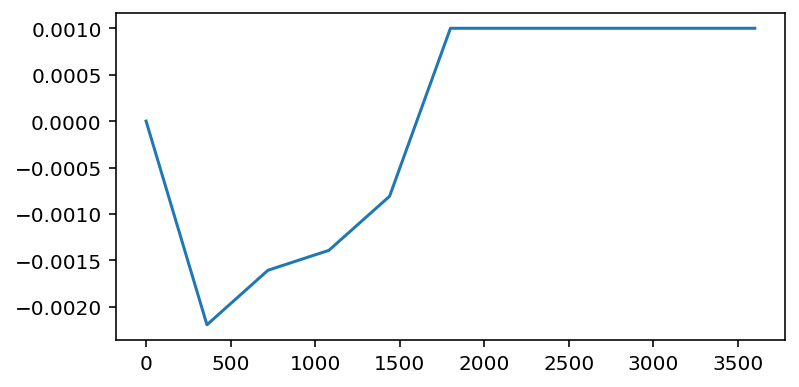

In [10]:
opt.newton(lambda x: swapN(curve, 5, x, swap_5), x0=curve[4*YEAR_COUNT], rtol=1e-15)
curve.plot(figsize=(6,3))

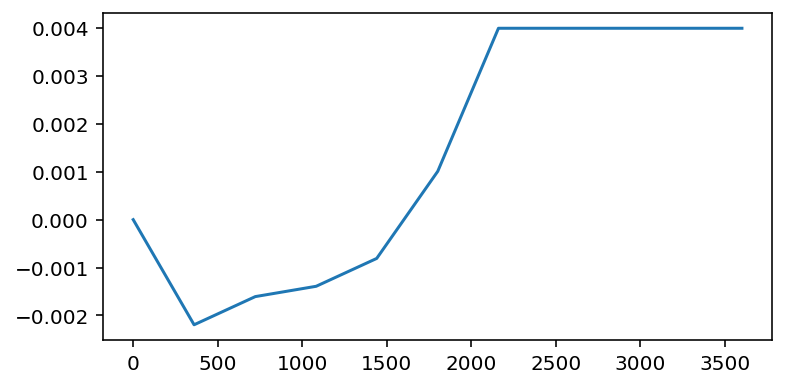

In [11]:
opt.newton(lambda x: swapN(curve, 6, x, swap_6), x0=curve[5*YEAR_COUNT], rtol=1e-15)
curve.plot(figsize=(6,3))

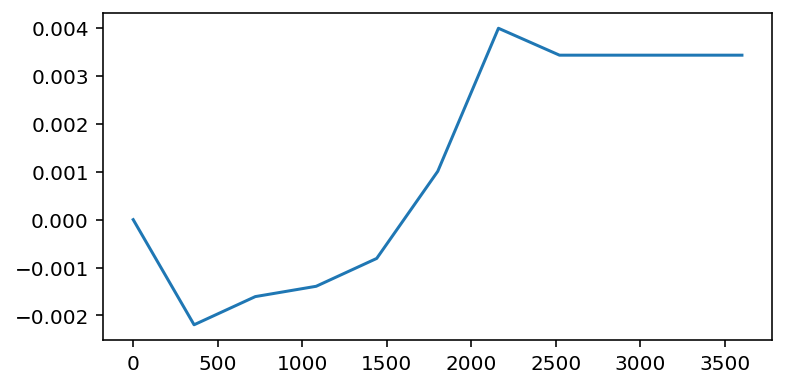

In [12]:
opt.newton(lambda x: swapN(curve, 7, x, swap_7), x0=curve[6*YEAR_COUNT], rtol=1e-15)
curve.plot(figsize=(6,3))

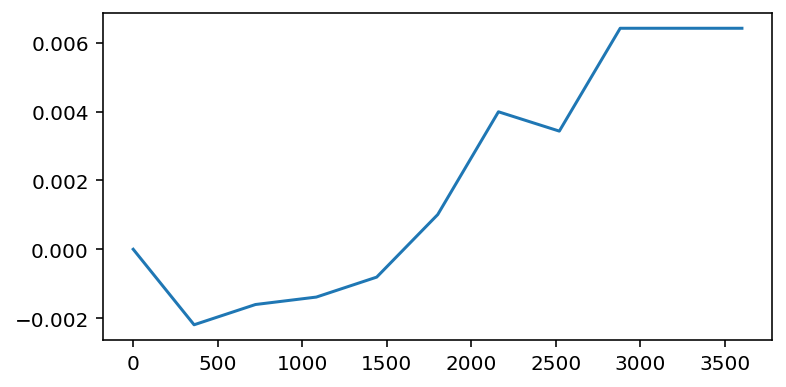

In [13]:
opt.newton(lambda x: swapN(curve, 8, x, swap_8), x0=curve[7*YEAR_COUNT], rtol=1e-15)
curve.plot(figsize=(6,3))

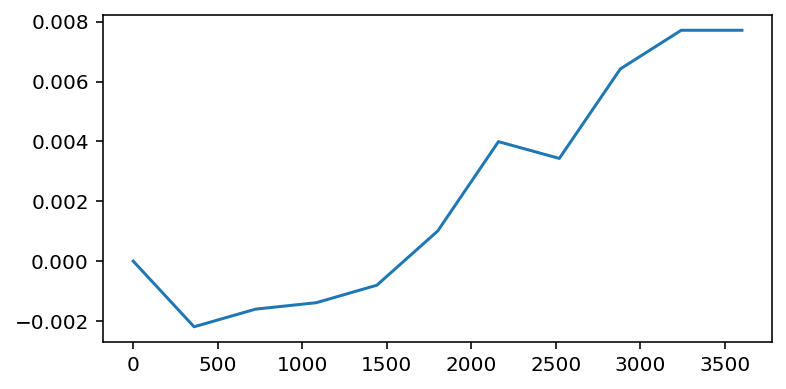

In [14]:
opt.newton(lambda x: swapN(curve, 9, x, swap_9), x0=curve[8*YEAR_COUNT], rtol=1e-15)
curve.plot(figsize=(6,3))

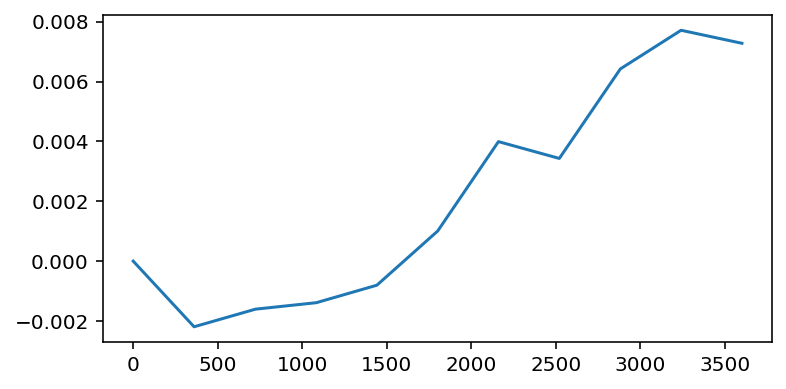

In [15]:
opt.newton(lambda x: swapN(curve, 10, x, swap_10), x0=curve[9*YEAR_COUNT], rtol=1e-15)
curve.plot(figsize=(6,3))